**Applied Empirical Analysis (HS 2020)**

**Conny Wunsch, Ulrike Unterhofer and Véra Zabrodina** -- University of Basel

***

# Lab Session 6 - Quantile Treatment Effects (QTE)

***

Key goal: look at treatment effects beyond the mean, i.e. different parts of the outcome distribution respond to the treatment. 

Example of QTE vs. ATE 

<img src="Quantile.JPG" alt="Drawing" style="width: 800px;"/>


Source: adapted from Markus Jochmann (2006), Three Essays on Bayesian Nonparametric Modeling in Microeconometrics.

## Application: Public-private sector wage differentials in Germany: Evidence from quantile regression

**Blaise Melly (Empirical Economics, 2005)**

For the author's website, with Stata and R codes and packages for quantile and distribution regression, see 


https://sites.google.com/site/blaisemelly/home/computer-programs

## 1. Introduction

* What is the research question, and why is it interesting? 
* Across which groups are the wage distributions compared (i.e. how are the treated and control groups defined)? 
* How do you expect the wage distributions to differ across these groups, and why? 


***

## 2. Notation and effects of interest


### Notation

**Outcome variable** $Y$:  Log wages (to have a normally distributed outcome)


**Binary treatment variable** $D\in\{0,1\}$: Public ($D=1$) versus private sector employment ($D=0$)


**Potential Outcomes:** $Y^*_0$, $Y^*_1$



### Cumulative distribution function (CDF)

$$F_Y(y)=Pr(Y\le y)=E[\underline{1}(Y\le y)]$$

CDF of the outcome variable $Y$ evaluated at $y$ is the share of observations lying below a given value $y$.

CDF of the log(wage) for the whole sample: 

<img src="CDF.JPG" alt="Drawing" style="width: 400px;"/>



### Quantile function

$$Q_Y(\tau)=F^{-1}_Y(\tau)=\inf\{y|F_Y(y)\ge\tau\}$$

Evaluated at $0<\tau<1$, the quantile function gives the value of $Y$ that splits the sample into shares defined by $\tau$.

E.g. $Q_Y(0.5)$ corresponds to the value of $Y$ at the median (50th percentile).

Quantile function of the log(wage) for the whole sample: 

<img src="QF.JPG" alt="Drawing" style="width: 400px;"/>


### Effects 

#### Average Treatement Effect (ATE)

So far we have analysed the effect of a treatment on the average outcome by looking at the 

$$ATE=E[Y^*_1-Y^*_0]$$

Now, we aim at estimating effects of a treatment on the distribution of the outcome variable. 


#### Distributional Treatment Effect (DTE)

$$DTE(y)=F_{Y^*_1}(y)-F_{Y^*_0}(y)$$

* Difference between the potential CDFs of the treatment and control group at a given value of $Y$.

* In other (loose) words, difference in the shares of observations in the treatment and control samples that fall below a given value $y$. 


#### Quantile Treatment Effect (QTE)

$$QTE(\tau)=Q_{Y^*_1}(\tau)-Q_{Y^*_0}(\tau)$$

* Difference between the potential quantile functions of the treatment and control group at a given quantile $\tau$.

* In other (loose) words, difference in the value of $Y$ that splits the treatment and control samples into shares defined by $\tau$.

* Note that $ATE=E[Y^*_1-Y^*_0]=E_{\tau}[QTE(\tau)]$ (that's why usually display OLS estimate for comparison). 





### Identification strategy and assumptions


* Quantile treatment effects can be obtained based on different identification strategies (e.g. selection on observables, IV, RDD, see readings list), which may call for various estimators (as with ATE). 


* If $D$ is randomly assigned, ATE, DTE and QTE directly identified.  


* With a classical **selection on observables** approach, standard identifying assumptions (SUTVA, CIA, common support). 


* Here, focus on explaining the wage gap (price differential) between public and private sector, and which part is due to differences in observable characteristics, rather recover a true causal effect.


* However, estimation approaches follow those based on selection on observables. 


* First, estimate QTE (with quantile regression).
* Second, use counterfactual distributions to estimate unconditional QTE and decompose into structure and composition. 

***

## 3. Data

Data on the wages and characteristics of a representative sample of 70k workers in Switzerland in 2014.

Limited set of variables for simplicity.


|variable name |   description |
|----:|----:|
| lnwage          |  log wage |
| public          |  Public sector |
| alter           |  Age |
| befristet       |  Fixed-term contract |
| teilzeit        |  Part-time work |
| frau            |  Female |
| nonswiss           | Non-Swiss |
| married         |  Married |
| case            |  ID |
| dienstjahre     |  Years of service |

***
## 4. Empirical Analysis

### Load packages

Specific packages, see documentation (both very extensive, can stick to options used here):
* `quantreg`: https://rdrr.io/cran/quantreg/man/rq.html
* `Counterfactual`: https://arxiv.org/pdf/1610.07894.pdf

In [1]:
rm(list=ls())


packages_vector <- c("haven", "dplyr", "tidyr", "sandwich", "expss",
                        "fBasics", "xtable", "data.table", "stargazer", "mfx", 
                        "jtools", "ggplot2")
#install.packages(packages_vector)
lapply(packages_vector, require, character.only = TRUE) 


# Quantile-specific packages 
packaged_vector_rdd <- c("quantreg", "Counterfactual")
# install.packages(packages_vector)
lapply(packaged_vector_rdd, require, character.only = TRUE) 


# List loaded packages 
(.packages())

print('All packages successfully installed and loaded.')

Loading required package: haven

Warning message:
"package 'haven' was built under R version 3.6.3"
Loading required package: dplyr

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: tidyr

Warning message:
"package 'tidyr' was built under R version 3.6.3"
Loading required package: sandwich

Warning message:
"package 'sandwich' was built under R version 3.6.3"
Loading required package: expss

Warning message:
"package 'expss' was built under R version 3.6.3"

Attaching package: 'expss'


The following objects are masked from 'package:tidyr':

    contains, nest


The following objects are masked from 'package:dplyr':

    between, compute, contains, first, last, na_if, recode, vars


The following objects are masked from 'package:haven':

    is.

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

Loading required package: quantreg

Warning message:
"package 'quantreg' was built under R version 3.6.3"
Loading required package: SparseM

Warning message:
"package 'SparseM' was built under R version 3.6.2"

Attaching package: 'SparseM'


The following object is masked from 'package:base':

    backsolve


Loading required package: Counterfactual

Warning message:
"package 'Counterfactual' was built under R version 3.6.3"
Registered S3 methods overwritten by 'Hmisc':
  method                 from 
  [.labelled             expss
  print.labelled         expss
  as.data.frame.labelled expss



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[1] "Counterfactual" "quantreg"       "SparseM"        "ggplot2"       
 [5] "jtools"         "mfx"            "betareg"        "MASS"          
 [9] "lmtest"         "zoo"            "stargazer"      "data.table"    
[13] "xtable"         "fBasics"        "timeSeries"     "timeDate"      
[17] "expss"          "sandwich"       "tidyr"          "dplyr"         
[21] "haven"          "stats"          "graphics"       "grDevices"     
[25] "utils"          "datasets"       "methods"        "base"

[1] "All packages successfully installed and loaded."


### Load data 

In [2]:
data <-as.data.frame(read_dta("data_simple.dta"))
attach(data)

head(data)

,alter,lnwage,befristet,teilzeit,frau,public,married,case,dienstjahre,nonswiss
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,40,8.690810,0,1,0,0,1,1,4,0
2,55,9.320091,0,0,0,0,0,7,15,0
3,42,8.246172,0,1,1,0,0,9,2,0
4,25,8.828934,0,0,0,0,0,22,7,0
5,53,8.422882,0,1,1,0,0,23,2,0
6,22,8.603371,0,0,1,0,0,25,0,1


***

## Descriptive statistics 

### Number of public and private sector employees

In [3]:
cro(public)

,,#Total
Public sector,0,53149
,1,18124
,#Total cases,71273


### Differences in average characteristics between individuals in the treatment and control group

In [4]:
# Variables for table
descriptives <- dplyr::select(data, lnwage, alter, frau, teilzeit, befristet, nonswiss, married, dienstjahre) 
descriptives_names  <- colnames(descriptives)


# Function for table display
repr_html.xtable <- function(obj, ...){
    paste(capture.output(print(obj, type = 'html')), collapse="", sep="")
}

# Define a function estimating the differences in variables across D
balance_check <- function(x){
    
 
    # Conditional means
    mean_private <- mean(x[data$public==0], na.rm=TRUE)
    mean_public <- mean(x[data$public==1], na.rm=TRUE)
    
    # Difference in means
    diff <- lm(x ~ data$public)
    cov <- vcovHC(diff, type = "HC")
    robust.se <- sqrt(diag(cov))
    
    list(mean_private = mean_private, 
         mean_public = mean_public,
         coeff = diff$coefficients[2], 
         robust.se = robust.se[2], 
         pval = 2*pnorm(-abs(diff$coefficients[2]/robust.se[2]))
        )             
}

diff_output <- apply(descriptives, 2, balance_check)

# convert list to table
diff_output<-rbindlist(diff_output)
rownames(diff_output)<- descriptives_names
colnames(diff_output)<- c("E(X|D=0)", "E(X|D=1)", 
                          "Difference", "s.e.", 
                          "p-value")

# plot table
print("Difference in means by treatment status")
xtable(diff_output, digits=3)

[1] "Difference in means by treatment status"


,E(X|D=0),E(X|D=1),Difference,s.e.,p-value
lnwage,8.826,8.985,0.159,0.003,0.000
alter,38.341,39.667,1.326,0.089,0.000
frau,0.426,0.542,0.117,0.004,0.000
teilzeit,0.286,0.501,0.216,0.004,0.000
befristet,0.031,0.135,0.105,0.003,0.000
nonswiss,0.341,0.180,-0.161,0.004,0.000
married,0.516,0.517,0.001,0.004,0.847
dienstjahre,8.031,8.872,0.841,0.073,0.000


### Wage distributions across groups
#### 1. Density Plot

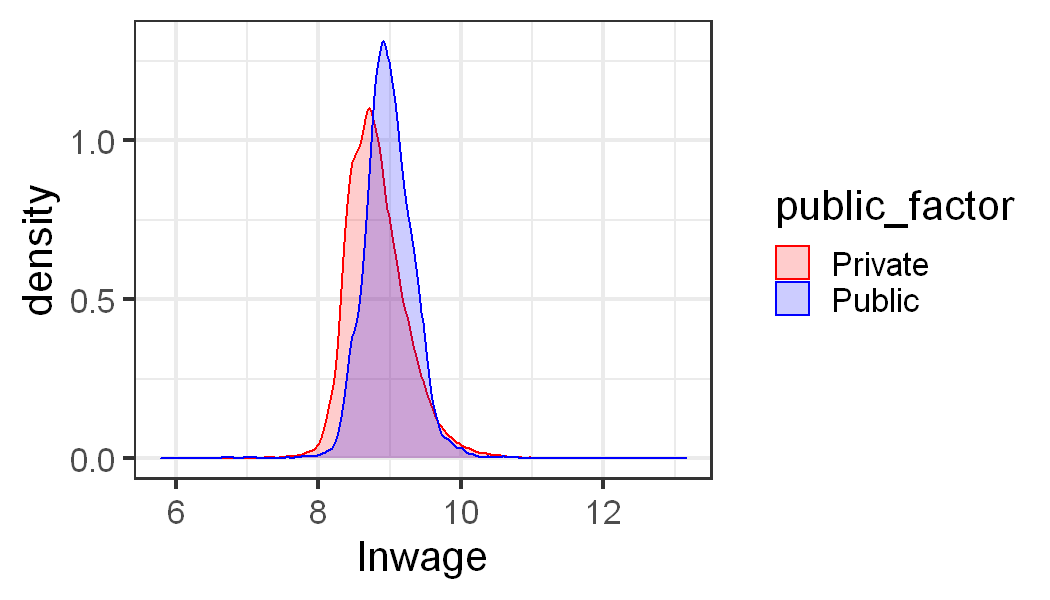

In [5]:
options(repr.plot.width=7, repr.plot.height=4, repr.plot.res = 150)

# Factor public variable for plot labelling 
data$public_factor <- factor(data$public, 
levels = c(0,1), label = c("Private", "Public")) 


density_public_private <- ggplot(data, 
    aes(x=lnwage, 
    group=public_factor, 
    color=public_factor, 
    fill=public_factor)) +
    geom_density(alpha=0.2) + # define to be density plot 
    scale_color_manual(values=c("red", "blue")) +
    scale_fill_manual(values=c("red", "blue")) +
    theme_bw(base_size = 20) 
density_public_private

**2. Cumulative Distribution**

The green line denotes the median.

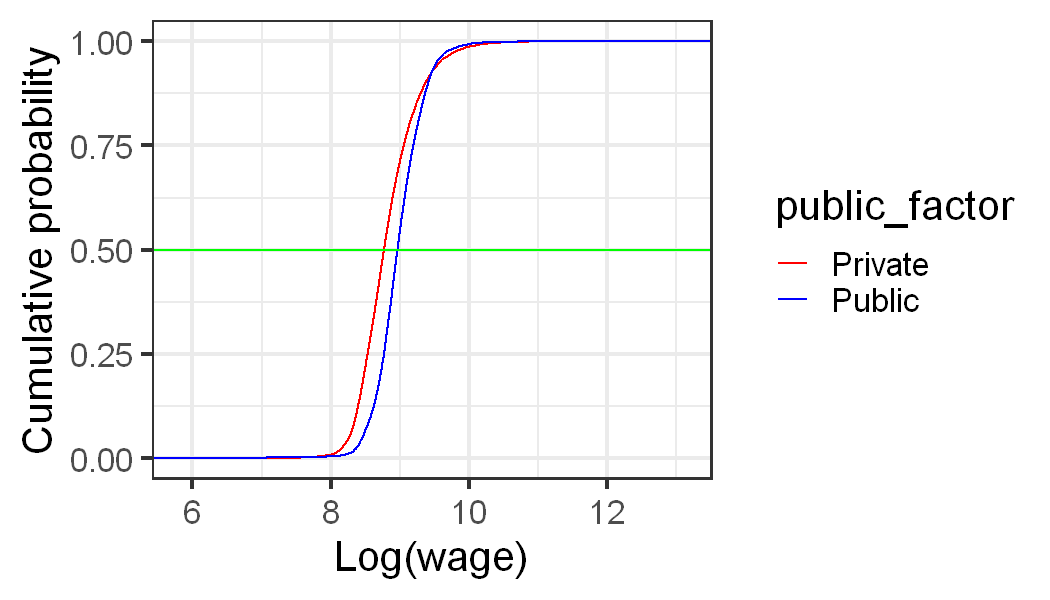

In [6]:
cdf_public_private <- ggplot(data, aes(lnwage, colour = public_factor)) + 
                        stat_ecdf() + # define CDF plot type 
                        ylab("Cumulative probability") +
                        xlab("Log(wage)") +
                        geom_hline(yintercept=0.5, color = "green") +
                        scale_color_manual(values=c("red", "blue")) +
                        scale_fill_manual(values=c("red", "blue")) +
                        theme_bw(base_size = 20) 

cdf_public_private

**3. Quantiles of wages**

In [7]:
q <- seq(0.1, 0.9, 0.2)

quantiles_all <- quantile(lnwage, 
                          probs = q, 
                          na.rm = FALSE,
                          names = TRUE,
                          type = 7)

quantiles_public <- quantile(lnwage[public==1], 
                             probs = q, 
                             na.rm = FALSE,
                             names = TRUE,
                             type = 7)

quantiles_private <- quantile(lnwage[public==0], 
                              probs = q, 
                              na.rm = FALSE,
                              names = TRUE, 
                              type = 7)

print("Quantiles of log wage all")
round(t(quantiles_all), 3)

print("Quantiles of log wage public sector")
round(t(quantiles_public), 3)

print("Quantiles of log wage private sector")
round(t(quantiles_private), 3)

[1] "Quantiles of log wage all"


10%,30%,50%,70%,90%
8.396,8.642,8.831,9.041,9.387


[1] "Quantiles of log wage public sector"


10%,30%,50%,70%,90%
8.579,8.812,8.968,9.142,9.412


[1] "Quantiles of log wage private sector"


10%,30%,50%,70%,90%
8.364,8.587,8.773,8.987,9.372


**4. Quantile Function**

In [8]:
# Public

# Sort observation by increasing logwage, and create identifier
lnwage_sorted <- sort(lnwage[public==1]) 
length <- length(lnwage_sorted)
i <- 1:length

# Compute the percentile of an observation
perc <- (i - 1)/(length - 1) 
data_plot_public <- data.frame(lnwage_sorted, perc)
data_plot_public$public <- 1

In [9]:
# same for Private
lnwage_sorted <- sort(lnwage[public==0]) 
length <- length(lnwage_sorted)
i <- 1:length

perc <- (i - 1)/(length - 1) # same as option type = 7 in quantile() command
data_plot_private <- data.frame(lnwage_sorted, perc)
data_plot_private$public <- 0

In [10]:
# Bind data and create factor variable
data_plot <- rbind(data_plot_public, data_plot_private)
data_plot$public_factor <- factor(data_plot$public, 
                        levels = c(0,1), label = c("Private", "Public")) 
head(data_plot)

,lnwage_sorted,perc,public,public_factor
,<dbl>,<dbl>,<dbl>,<fct>
1,5.777652,0.0000000000,1,Public
2,5.849325,0.0000551785,1,Public
3,6.347389,0.0001103570,1,Public
4,6.361302,0.0001655355,1,Public
5,6.492240,0.0002207140,1,Public
6,6.536692,0.0002758925,1,Public


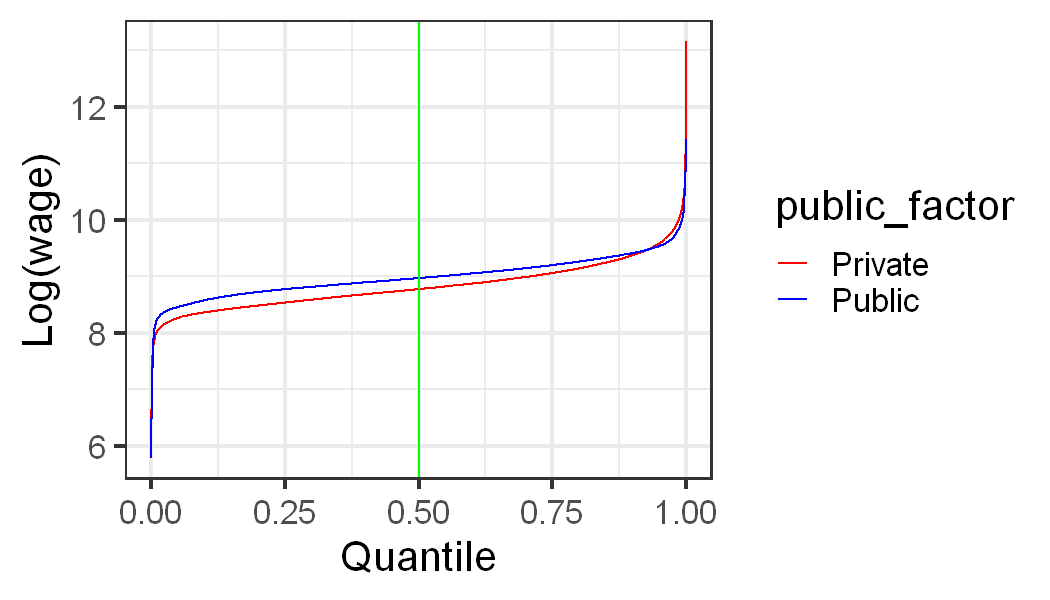

In [11]:
qplot_public_private <- ggplot(data_plot, aes(x = perc, y = lnwage_sorted, 
                        group=public_factor, color=public_factor)) +
                        geom_line() + 
                        geom_vline(xintercept=0.5, color = "green") +
                        ylab("Log(wage)") +
                        xlab("Quantile") +
                        scale_color_manual(values=c("red", "blue")) + 
                        theme_bw(base_size = 20) 

qplot_public_private

***

## Estimation


### Unconditional Mean
We estimate sample means in the subsample of public and private sector employees.


The unconditional mean solves:
$$\mu=\arg\min_m E[(Y-m)^2]$$


* The coefficient on the treatment variable in an OLS regression model with only a constant and a treatment indicator is numerically identical to the difference in unconditional means across subsamples of treated and control observations (ATE).

In [12]:
ols1 <- lm(lnwage ~ public)
out.ols1 <-summ(ols1, robust = "HC1")
out.ols1

MODEL INFO:
Observations: 71273
Dependent Variable: lnwage
Type: OLS linear regression 

MODEL FIT:
F(1,71271) = 2041.94, p = 0.00
R² = 0.03
Adj. R² = 0.03 

Standard errors: Robust, type = HC1
------------------------------------------------
                    Est.   S.E.    t val.      p
----------------- ------ ------ --------- ------
(Intercept)         8.83   0.00   4774.93   0.00
public              0.16   0.00     49.43   0.00
------------------------------------------------

* How do you interpret the coefficient of interest?

### Conditional OLS

* In addition to the treatment variable we include control variables to control for selection into the sectors.

* We center the continuous covariates at the mean to be able to interpret intercepts for a representative case.


In [17]:
# Selected covariates
covariates_bin <- dplyr::select(data, frau, teilzeit, befristet, nonswiss, married) 
covariates_cont <- dplyr::select(data, alter) 

# display mean
print("Mean age")
mean(covariates_cont$alter)

# center continuous covariates at the mean
covariates_cont$alter <- covariates_cont$alter - mean(covariates_cont$alter)
summary(covariates_cont$alter)

[1] "Mean age"


[1] 38.67791

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-20.6779  -8.6779   0.3221   0.0000   8.3221  18.3221 

In [18]:
covariates <- cbind(covariates_bin, covariates_cont)
covariates_names  <- colnames(covariates)
covariates <- as.matrix(covariates) # make sure covariates are a matrix 
          
head(covariates)

frau,teilzeit,befristet,nonswiss,married,alter
0,1,0,0,1,1.322086
0,0,0,0,0,16.322086
1,1,0,0,0,3.322086
0,0,0,0,0,-13.677914
1,1,0,0,0,14.322086
1,0,0,1,0,-16.677914


Conditional OLS solves:
$$\beta=\arg\min_b E[(Y-X'b)^2]$$

In [64]:
ols2 <- lm(lnwage ~ public + covariates)
out.ols2 <-summ(ols2, robust = "HC1")
out.ols2

MODEL INFO:
Observations: 71273
Dependent Variable: lnwage
Type: OLS linear regression 

MODEL FIT:
F(6,71266) = 2623.26, p = 0.00
R² = 0.18
Adj. R² = 0.18 

Standard errors: Robust, type = HC1
--------------------------------------------------------
                            Est.   S.E.    t val.      p
------------------------ ------- ------ --------- ------
(Intercept)                 8.92   0.00   3264.40   0.00
public                      0.16   0.00     54.79   0.00
covariatesfrau             -0.15   0.00    -46.20   0.00
covariatesteilzeit         -0.07   0.00    -19.30   0.00
covariatesnonswiss         -0.08   0.00    -23.75   0.00
covariatesmarried           0.04   0.00     14.52   0.00
covariatesalter             0.01   0.00     78.93   0.00
--------------------------------------------------------

* How do you interpret the coefficient of interest?


### Unconditional median regression

Estimate unconditional quantile functions in the subsample of public and private sector employees.

The $\tau$ unconditional quantile solves:
$$Q_Y(\tau)=\arg\min_q E[\rho_{\tau}(Y-q)]$$

at the median

$$Q_Y(0.5)=\arg\min_q E[\rho_{0.5}(Y-q)]$$

where $\rho_{\tau}$ replaces the absolute values:
$$\rho_{\tau}(Y-q)=\{\tau-\underline{1}[(Y-q)\le 0]\}\cdot (Y-q)$$

The coefficient on the treatment variable in a quantile regression model with only a constant and a treatment indicator is numerically identical to the difference in unconditional quantile functions across subsamples of treated and control observations (QTE).

In [65]:
rq1 <- rq(lnwage ~ public, 
          tau=.5, 
          data=data, 
          method="br", 
          model = TRUE) 
out.rq1 <- summary(rq1)
out.rq1

median_public <- quantile(lnwage[public==1], .5)
print("Median public sector")
median_public

median_private <- quantile(lnwage[public==0], .5)
print("Median private sector")
median_private

Warning message in rq.fit.br(x, y, tau = tau, ...):
"Solution may be nonunique"



Call: rq(formula = lnwage ~ public, tau = 0.5, data = data, method = "br", 
    model = TRUE)

tau: [1] 0.5

Coefficients:
            Value      Std. Error t value    Pr(>|t|)  
(Intercept)    8.77292    0.00206 4262.71116    0.00000
public         0.19458    0.00356   54.73319    0.00000

[1] "Median public sector"


50% 
8.967505

[1] "Median private sector"


50% 
8.77292

* How do you interpret the coefficient of interest?


### Conditional quantile regression

The $\tau$ conditional quantile regression solves:
$$\beta(\tau)=\arg\min_b E[\rho_{\tau}(Y-X'b)]$$


In [66]:
# Conditional quantile for the median

rq2 <- rq(lnwage ~ public + covariates, 
            tau=.5, 
            data=data, 
            method="br", 
            model = TRUE) 
out.rq2 <- summary(rq2)
out.rq2

Warning message in rq.fit.br(x, y, tau = tau, ...):
"Solution may be nonunique"



Call: rq(formula = lnwage ~ public + covariates, tau = 0.5, data = data, 
    method = "br", model = TRUE)

tau: [1] 0.5

Coefficients:
                   Value      Std. Error t value    Pr(>|t|)  
(Intercept)           8.86847    0.00307 2888.42223    0.00000
public                0.20277    0.00335   60.57854    0.00000
covariatesfrau       -0.13452    0.00333  -40.37478    0.00000
covariatesteilzeit   -0.04100    0.00348  -11.77744    0.00000
covariatesnonswiss   -0.10783    0.00371  -29.08435    0.00000
covariatesmarried     0.03188    0.00336    9.49657    0.00000
covariatesalter       0.01076    0.00016   68.02780    0.00000

* How do you interpret the coefficient of interest?

In [67]:
# Conditional quantile regression, across different quantiles

# Vector of quantiles to be estimated has to be strictly within (0,1) interval 
quants <- as.matrix(seq(0.1, 0.9, by=0.2)) 

rq3 <- rq(formula = lnwage ~ public + covariates, 
            tau=quants, 
            data=data, 
            method="br", 
            model = TRUE) 
out.rq3 <- summary(rq3)
out.rq3

Warning message in rq.fit.br(x, y, tau = tau, ...):
"Solution may be nonunique"
Warning message in rq.fit.br(x, y, tau = tau, ...):
"Solution may be nonunique"



Call: rq(formula = lnwage ~ public + covariates, tau = quants, data = data, 
    method = "br", model = TRUE)

tau: [1] 0.1

Coefficients:
                   Value      Std. Error t value    Pr(>|t|)  
(Intercept)           8.52485    0.00327 2606.45691    0.00000
public                0.20503    0.00399   51.32606    0.00000
covariatesfrau       -0.14714    0.00375  -39.27082    0.00000
covariatesteilzeit   -0.05414    0.00406  -13.33042    0.00000
covariatesnonswiss   -0.13991    0.00422  -33.17474    0.00000
covariatesmarried     0.02270    0.00363    6.25587    0.00000
covariatesalter       0.00657    0.00017   38.37695    0.00000

Call: rq(formula = lnwage ~ public + covariates, tau = quants, data = data, 
    method = "br", model = TRUE)

tau: [1] 0.3

Coefficients:
                   Value      Std. Error t value    Pr(>|t|)  
(Intercept)           8.71619    0.00264 3299.93302    0.00000
public                0.21748    0.00324   67.12738    0.00000
covariatesfrau       -0.141

### Presenting QR results

**Recipe:**

* Plot graphs of the coefficient estimates with confidence bounds: y-axis:  covariate effects $β(\tau)$; x-axis: quantile of $Y$.


* Show the corresponding OLS coefficient (ATE) estimate and confidence intervals.


* Interpret the meaning of the effects:
    * Intercept: Condiitonal distribution of individual with baseline characteristics
    * Other coefficients: impact of a on unit change of the covariate/treatment on the $\tau$th conditional quantile of the log wage holding the other covariates fixed (*ceteris paribus*).
    * In this context: rates of return to various characteristics at the specified quantile of the conditional distribution.


* Interpret the meaning of the pattern (location, location/scale shift argumentation)
    * The impact of $X$ is the same across quantiles and is non-zero on average (ATE): location shift of the distribution of $Y$
    * The impact of $X$ differs across quantiles but is zero on average: scale shift of the distribution of $Y$
    * The impact of $X$ differs across quantiles and is non-zero on average: location and scale shift of the distribution of $Y$




### Plot conditional quantile effects

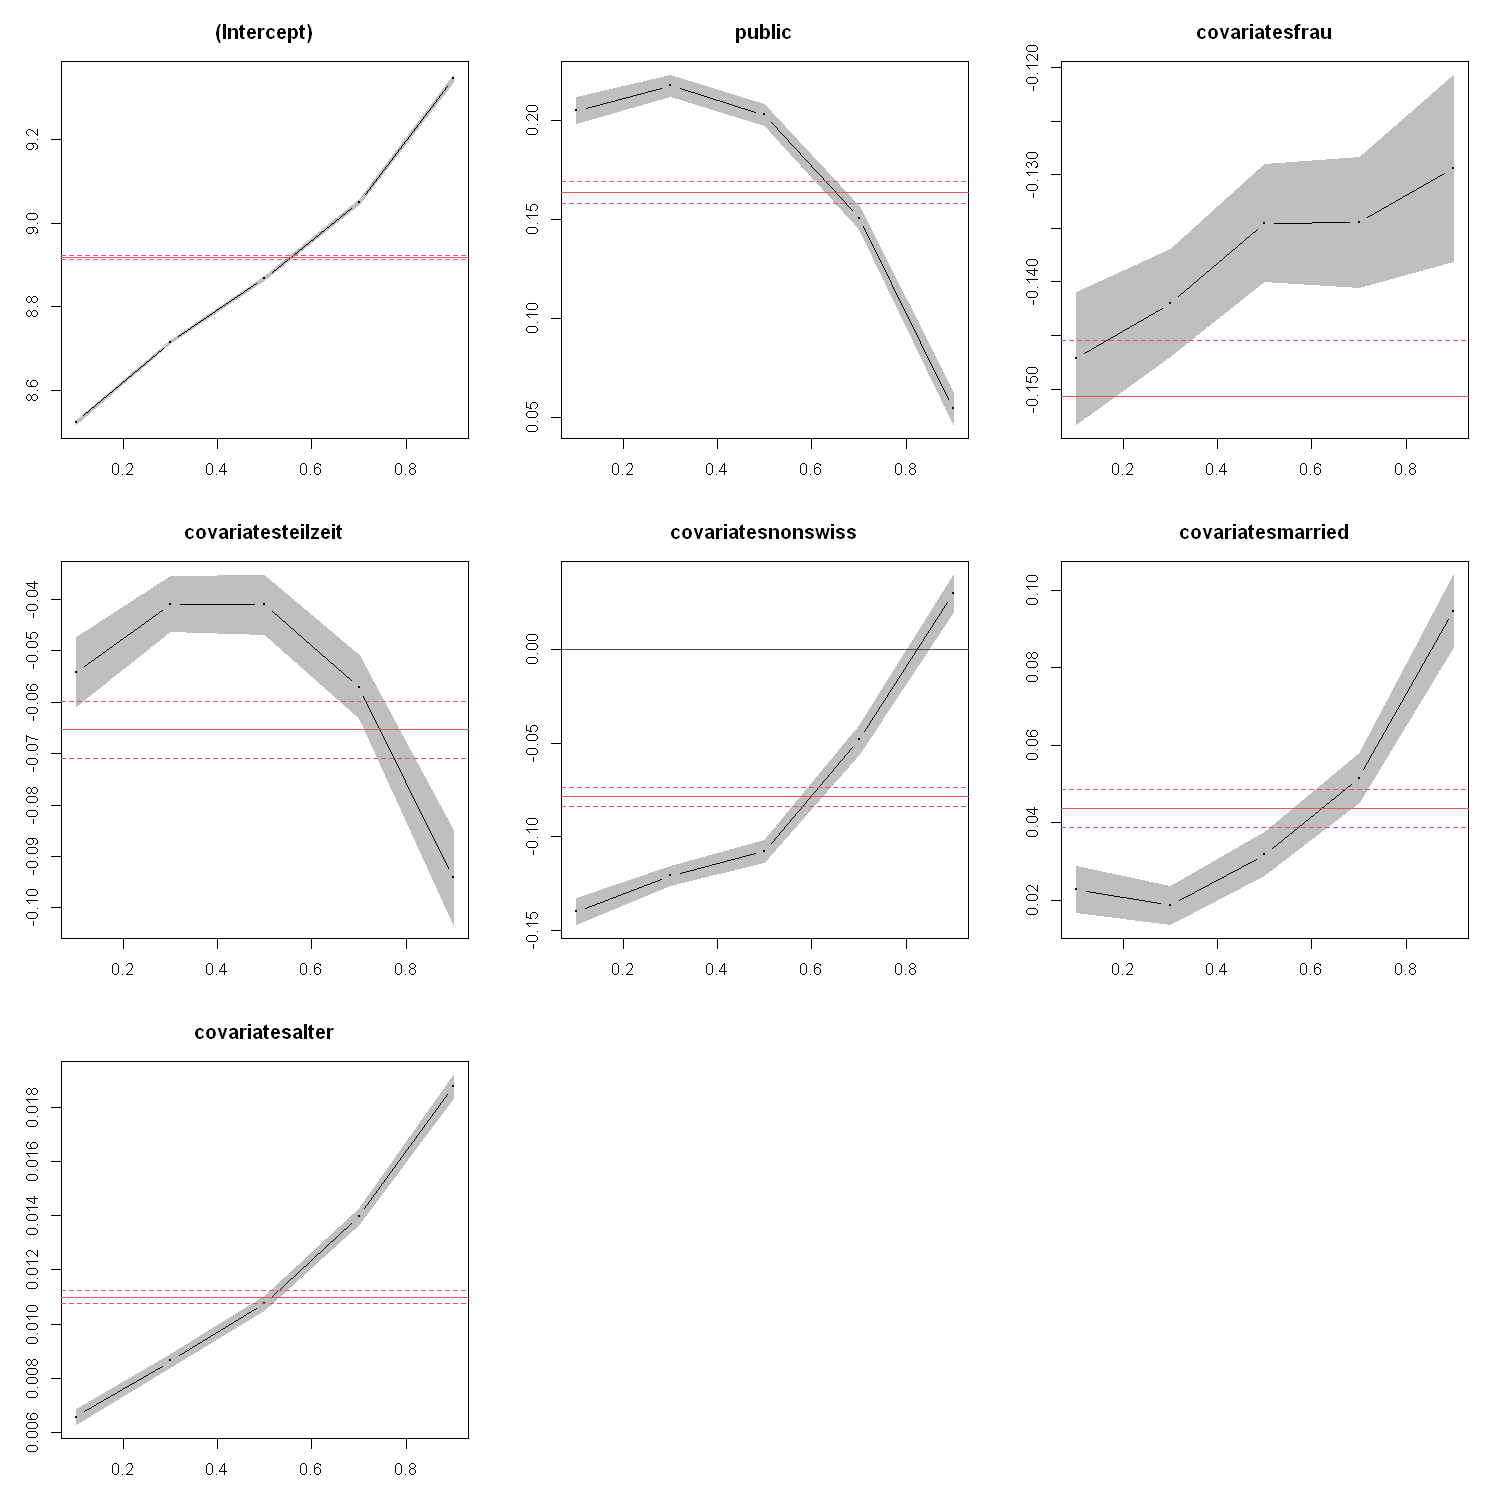

In [68]:
# Plot quantile effects
options(repr.plot.width=10, repr.plot.height=10, repr.plot.res = 150)
plot(out.rq3, cex.lab=3, cex.axis=1.5)

Conditional QTE are not always straightforward to interpret (only for a representative case).

Now we want to derive unconditional QTE.

***

## Counterfactual distributions for decompositions

### Quantile decomposition for the public-private wage gap

From the lecture, 

* $F_{X_d}(x)$ is worker composition in $d\in\{0,1\}$.
* $F_{Y_d}(y|x)$ is the conditional on $x$ wage structure in $d\in\{0,1\}$.
* Define for $d, d' \in \{0,1\}$:
$$F_{Y(d,d')}(y)\equiv\int F_{Y_d}(y|x)dF_{X_{d'}}(x)$$

* $F_{Y(d,d)}(y)$ is the observed wage distribution of workers with $D=d$.
* $F_{Y(d,1-d)}(y)$ is the counterfactual wage distribution of workers with $D=d$ had they had the composition of characteristics of those with $D=1-d$.
* For the quantiles:
$$Q_{Y(d,1-d)}(\tau)=\inf\{y:F_{Y(d,1-d)}(y)\ge\tau\},\quad 0<\tau<1$$


We can then write

$Q_{Y(d,d)}(\tau)-Q_{Y(1-d,1-d)}(\tau)$


$$\quad =[\underbrace{Q_{Y(d,d)}(\tau)-Q_{Y(1-d,d)}(\tau)}_{structure}]+[\underbrace{Q_{Y(1-d,d)}(\tau)-Q_{Y(1-d,1-d)}(\tau)}_{composition}]$$
$$\quad =[\underbrace{Q_{Y(d,d)}(\tau)-Q_{Y(d,1-d)}(\tau)}_{composition}]+[\underbrace{Q_{Y(d,1-d)}(\tau)-Q_{Y(1-d,1-d)}(\tau)}_{structure}]$$


**Main steps**

Implement estimation and inference methods for counterfactual distributions described in Chernozhukov, Fernandez-Val and Melly (2013)

1. Quantile regression for $J$ equally spaced quantiles (e.g. 99) separately in private and public sector:


$$Q_{Y_d}(u|X)=X_i'\beta_d(u),\quad u|X\sim U(0,1)$$


2. Predict $X_i'\hat{\beta}_d(u)$ for all quantiles $u$ and all $i$ (private and public).


3. Estimation of the unconditional quantiles using the entire sample:


$$\hat{Q}_{Y_d}(\tau)=\inf\left\{y:\frac{1}{N}\sum_{i=1}^N\Big[\frac{1}{J}\sum_{j=1}^J\underline{1}(X_{i}'\hat{\beta}_d(u_j)\le y)\Big]\ge\tau\right\}$$


4. Estimation of the unexplained wage gap (QTEs of working in public sector):
$$\hat{QTE}_Y(\tau)=\hat{Q}_{Y_1}(\tau)-\hat{Q}_{Y_0}(\tau)$$


Easy: use the `Counterfactual` package (see introduction https://arxiv.org/pdf/1610.07894.pdf). 

In [69]:
# Draw a small random sample (since the estimation takes long)
index <- sample(x=1:nrow(data), size=1000)
sample_cf <- data[index,]
covariates <-covariates[index,]

# Define the quantiles and the range
taus <- c(1:99)/100
first <- sum(as.double(taus <= .10))
last <- sum(as.double(taus <= .90))
rang <- c(first:last)
# tails of the distribution should not be used because standard asymptotic does not apply to these parts.

# Estimation
set.seed(123456) # don't forget 
rq.4 <-  counterfactual(lnwage ~ covariates, # regression formula 
                        data=sample_cf, # sample  
                        group=public, # treated and control populations 
                        quantiles=taus, # quantiles
                        treatment = TRUE, # computes structure effect
                        decomposition = TRUE, # also computes composition and total effect (only useful when treatment = TRUE)
                        method="qr", # quantile regression estimation method, the default
                        reps = 49, # bootstrap replications  
                        sepcore = TRUE, ncore=2 # use multiple cores to speed up computation 
                        ) 

Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"
Warning message in rq.fit.br(wx, wy, tau = tau, ...):
"Solution may be nonunique"


cores used= 2 
                                  
Conditional Model:                      linear quantile regression
Number of regressions estimated:         100 

The variance has been estimated by bootstraping the results 49 times.

No. of obs. in the reference group:      744 
No. of obs. in the counterfactual group: 256 


                    Quantile Effects -- Structure                      
---------------------------------------------------------------------- 
                     Pointwise      Pointwise           Functional     
 Quantile     Est.    Std.Err   95% Conf.Interval   95% Conf.Interval  
    0.01     0.255    0.0568     0.143     0.366     0.105     0.404
    0.02     0.254    0.0493     0.157      0.35     0.124     0.383
    0.03     0.253    0.0425     0.169     0.336     0.141     0.364
    0.04     0.252     0.037     0.179     0.324     0.154     0.349
    0.05      0.25    0.0353     0.181     0.319     0.157     0.343
    0.06     0.249    0.0341     0.182

#### Plot the estimated effects

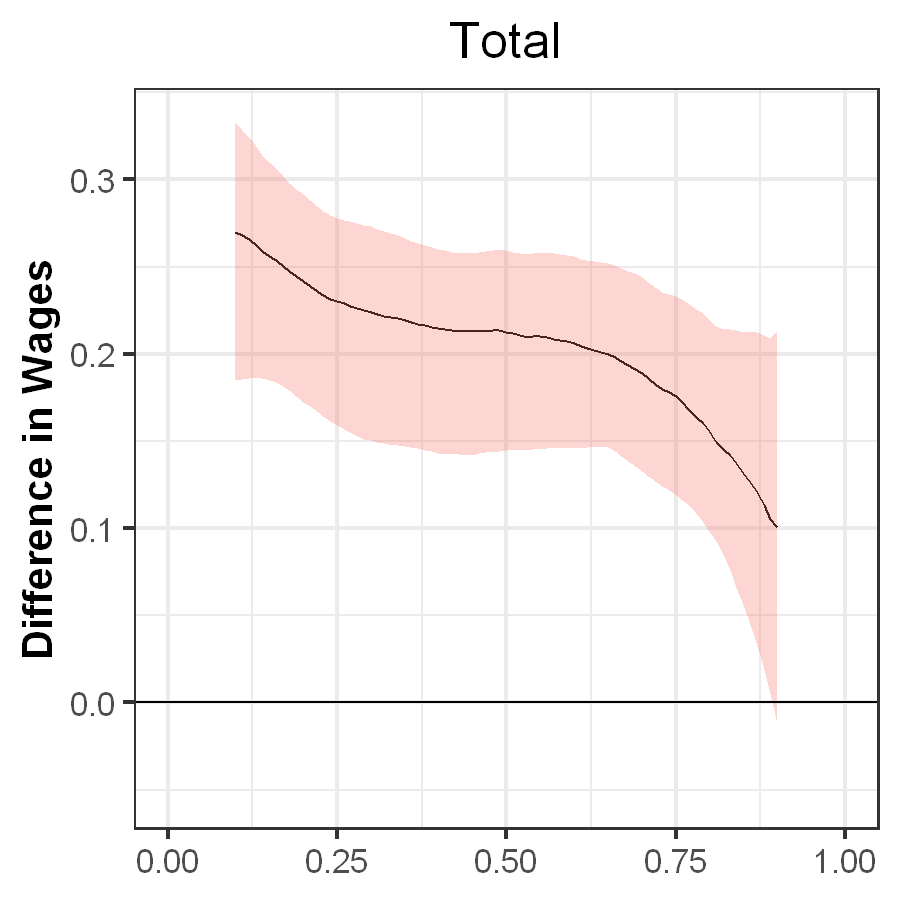

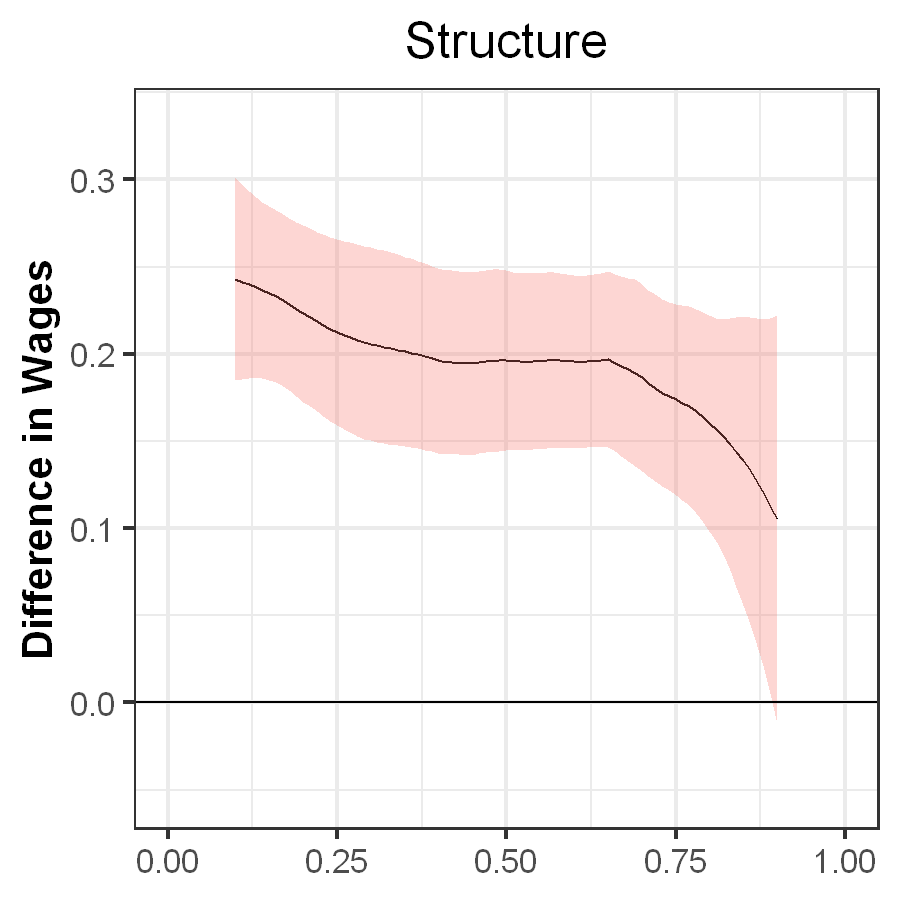

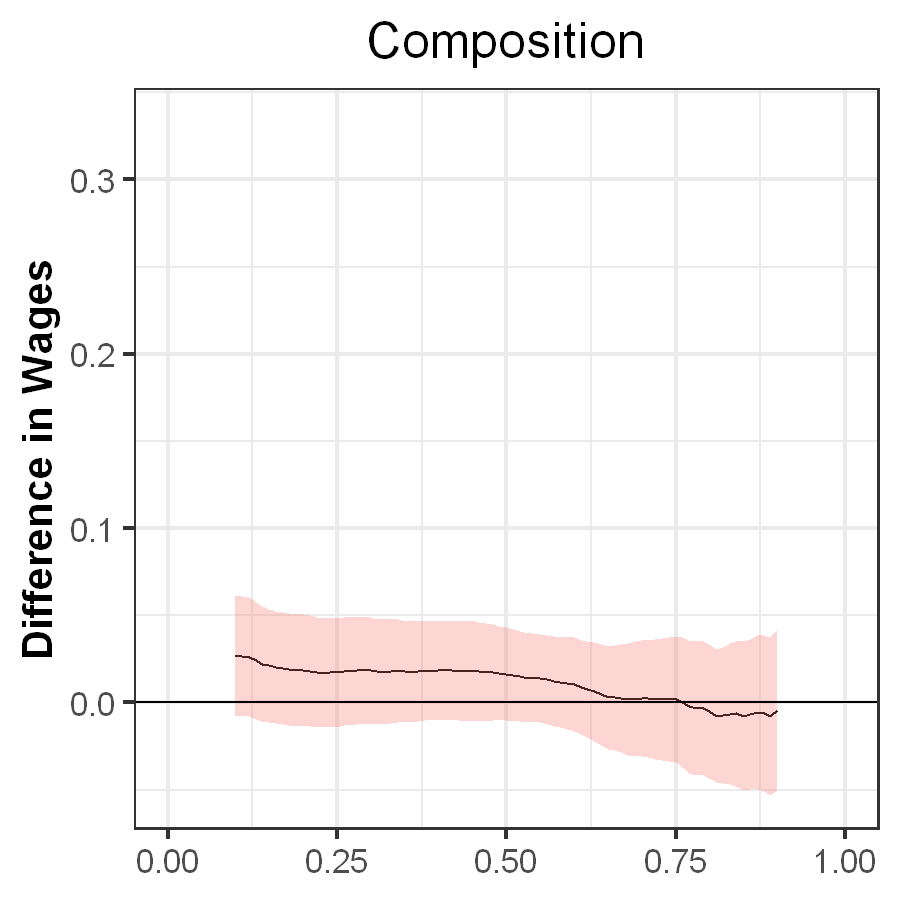

In [70]:
# Collect estimates and SE

# Structure
duqf_SE <- (rq.4$resSE)[,1]
l.duqf_SE <- (rq.4$resSE)[,3]
u.duqf_SE <- (rq.4$resSE)[,4]

# Composition
duqf_CE <- (rq.4$resCE)[,1]
l.duqf_CE <- (rq.4$resCE)[,3]
u.duqf_CE <- (rq.4$resCE)[,4]

# Total
duqf_TE <- (rq.4$resTE)[,1]
l.duqf_TE <- (rq.4$resTE)[,3]
u.duqf_TE <- (rq.4$resTE)[,4]

# create one data set for all estimates
rq.4_se <- cbind(duqf_SE,l.duqf_SE,u.duqf_SE)
rq.4_ce <- cbind(duqf_CE,l.duqf_CE,u.duqf_CE)
rq.4_te <- cbind(duqf_TE,l.duqf_TE,u.duqf_TE)
rq.4_all <- as.data.frame(cbind(taus, rq.4_se, rq.4_ce, rq.4_te))
rq.4_all <- rq.4_all[rang,]

# Define a range for y
min_y <- min(c(min(l.duqf_SE[rang]), min(l.duqf_CE[rang]),min(l.duqf_TE[rang])))
max_y <- max(c(max(u.duqf_SE[rang]), max(u.duqf_CE[rang]),max(u.duqf_TE[rang])))

# Plot with ggplot

options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 150)

p.te<-ggplot()+
      geom_line(data = rq.4_all, aes(x = taus, y = duqf_TE)) +
      geom_ribbon(data=rq.4_all, aes(ymin=l.duqf_SE,ymax=u.duqf_TE,  x=taus, fill = "band" ),alpha=0.3)+
      theme_bw(base_size = 20) +
      theme(axis.title = element_text(face = "bold"),
            axis.title.x = element_blank()) +
      ylab("Difference in Wages") +
      xlab("Quantiles") +
      ylim(min_y, max_y) +
      xlim(0, 1) +
      geom_hline(yintercept = 0) +
      theme(legend.position = "none") +
      ggtitle("Total") +
      theme(plot.title = element_text(hjust = 0.5))

p.se<-ggplot()+
      geom_line(data = rq.4_all, aes(x = taus, y = duqf_SE)) +
      geom_ribbon(data=rq.4_all, aes(ymin=l.duqf_SE,ymax=u.duqf_SE,  x=taus, fill = "band" ),alpha=0.3)+
       theme_bw(base_size = 20) +
      theme(axis.title = element_text(face = "bold"),
            axis.title.x = element_blank()) +
      ylab("Difference in Wages") +
      xlab("Quantiles") +
      ylim(min_y, max_y) +
      xlim(0, 1) +
      geom_hline(yintercept = 0) +
      theme(legend.position = "none") +
      ggtitle("Structure")  +
      theme(plot.title = element_text(hjust = 0.5))

p.ce<-ggplot()+
      geom_line(data = rq.4_all, aes(x = taus, y = duqf_CE)) +
      geom_ribbon(data=rq.4_all, aes(ymin=l.duqf_CE,ymax=u.duqf_CE,  x=taus, fill = "band" ),alpha=0.3)+
       theme_bw(base_size = 20) +
      theme(axis.title = element_text(face = "bold"),
            axis.title.x = element_blank()) +
      ylab("Difference in Wages") +
      xlab("Quantiles") +
      ylim(min_y, max_y) +
      xlim(0, 1) +
      geom_hline(yintercept = 0) +
      theme(legend.position = "none") +
      ggtitle("Composition")  +
      theme(plot.title = element_text(hjust = 0.5))

p.te
p.se
p.ce

Interpretation
* Location shift + scale shift. 
* Here, mostly unexplained differences that depend on the sector itself (i.e. unexplained wage gap, price differential, structure difference), and cannot be explained by differences in observable characteristics.  
* Very few covariates included! Far from a credible decomposition (and even more from a true causal effect). 

### Thank you for your attention and participation!